In [1]:
#Importing the libraries

import numpy as np                      #for math calculations
import pandas as pd                     #for dataframe related functions
from copy import copy
import matplotlib.pyplot as plt         #for plotting graphs
from pandas import Series               #To work on Series
from datetime import datetime           #To access datetime
import datetime as dt
%matplotlib inline
import warnings                         #To ignore the warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
pd.show_versions()


INSTALLED VERSIONS
------------------
commit: None
python: 3.7.0.final.0
python-bits: 64
OS: Windows
OS-release: 7
machine: AMD64
processor: Intel64 Family 6 Model 23 Stepping 10, GenuineIntel
byteorder: little
LC_ALL: None
LANG: None
LOCALE: None.None

pandas: 0.23.4
pytest: 3.8.0
pip: 10.0.1
setuptools: 41.6.0
Cython: 0.28.5
numpy: 1.15.1
scipy: 1.1.0
pyarrow: None
xarray: None
IPython: 6.5.0
sphinx: 1.7.9
patsy: 0.5.0
dateutil: 2.7.3
pytz: 2018.5
blosc: None
bottleneck: 1.2.1
tables: 3.4.4
numexpr: 2.6.8
feather: None
matplotlib: 2.2.3
openpyxl: 2.5.6
xlrd: 1.1.0
xlwt: 1.3.0
xlsxwriter: 1.1.0
lxml: 4.2.5
bs4: 4.6.3
html5lib: 1.0.1
sqlalchemy: 1.2.11
pymysql: None
psycopg2: None
jinja2: 2.10
s3fs: None
fastparquet: None
pandas_gbq: None
pandas_datareader: None


In [3]:
#train=pd.read_csv("Train_SU63ISt.csv",parse_dates= [col],encoding='utf-8-sig', usecols= ['Datetime', 'ID'])
#test=pd.read_csv("Test_0qrQsBZ.csv",parse_dates= [col],encoding='utf-8-sig', usecols= ['Datetime', 'ID'])


In [4]:
#import the train and test files.

train=pd.read_csv("Train_SU63ISt.csv")
test=pd.read_csv("Test_0qrQsBZ.csv")

In [5]:
#Create a copy of Train and Test files.

train_original=train.copy()
test_original=test.copy()

# Determine Hypothesis based on limited evidences.

    1.Traffic will increase as the years pass by
    2.Traffic will be high from May to October
    3.Traffic on weekdays will be morethan weekends
    4.Traffic during the peak hours will be high

In [6]:
#determine the train shape.

print(train.head())
print(train.shape)

   ID          Datetime  Count
0   0  25-08-2012 00:00      8
1   1  25-08-2012 01:00      2
2   2  25-08-2012 02:00      6
3   3  25-08-2012 03:00      2
4   4  25-08-2012 04:00      2
(18288, 3)


In [7]:
#determine the test shape.

print(test.head())
print(test.shape)

      ID          Datetime
0  18288  26-09-2014 00:00
1  18289  26-09-2014 01:00
2  18290  26-09-2014 02:00
3  18291  26-09-2014 03:00
4  18292  26-09-2014 04:00
(5112, 2)


In [8]:
#know the columns

train.columns,test.columns

(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

In [9]:
#Know the object types

train.dtypes,test.dtypes

(ID           int64
 Datetime    object
 Count        int64
 dtype: object, ID           int64
 Datetime    object
 dtype: object)

Feature Extraction

In [10]:
#Features to be extracted based on hypothesis.

train['Datetime']=pd.to_datetime(train.Datetime,errors='coerce',format='%d-%m-%Y %H:%M')
test['Datetime']=pd.to_datetime(test.Datetime,errors='coerce',format='%d-%m-%Y %H:%M')

test_original['Datetime']=pd.to_datetime(test_original.Datetime,errors='coerce',format='%d-%m-%Y %H:%M')
train_original['Datetime']=pd.to_datetime(train_original.Datetime,errors='coerce',format='%d-%m-%Y %H:%M')

Mapping with observed hypothesis factors:
    

In [11]:
#Splitting the datetime single column with multiple possible columns for complete data set

for i in (train, test, test_original, train_original):
    i['year']=i.Datetime.dt.year 
    i['month']=i.Datetime.dt.month 
    i['day']=i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour 

In [12]:
#After split,to know what are the values for day of week.

train['day of Week']=train['Datetime'].dt.dayofweek 
temp=train['Datetime']
temp.head()

0   2012-08-25 00:00:00
1   2012-08-25 01:00:00
2   2012-08-25 02:00:00
3   2012-08-25 03:00:00
4   2012-08-25 04:00:00
Name: Datetime, dtype: datetime64[ns]

In [13]:
#creating a function to apply values.Assign the values accordingly.

def applyer(row):
    if row.dayofweek ==5 or row.dayofweek ==6:
        return 1
    else:
        return 0   

In [14]:
#Feature transformed into edible values.

temp2=train['Datetime'].apply(applyer)
train['weekend']=temp2
temp2.tail()

18283    0
18284    0
18285    0
18286    0
18287    0
Name: Datetime, dtype: int64

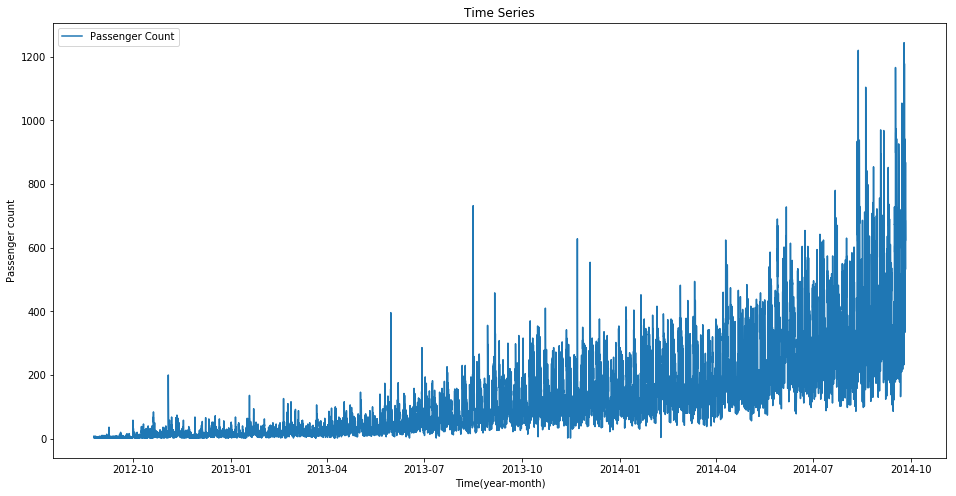

In [15]:
train.index = train['Datetime'] # indexing the Datetime to get the time period on the x-axis. 
df=train.drop('ID',1)           # drop ID variable to get only the Datetime on x-axis. 
ts = df['Count'] 
plt.figure(figsize=(16,8)) 
plt.plot(ts, label='Passenger Count') 
plt.title('Time Series') 
plt.xlabel("Time(year-month)") 
plt.ylabel("Passenger count") 
plt.legend(loc='best')

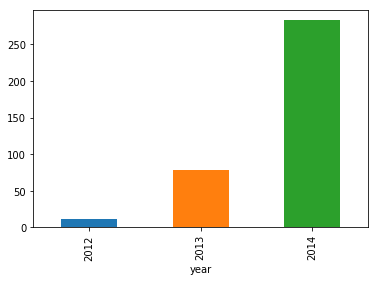

In [16]:
#Based on Hypothesis 1
train.groupby('year')['Count'].mean().plot.bar()

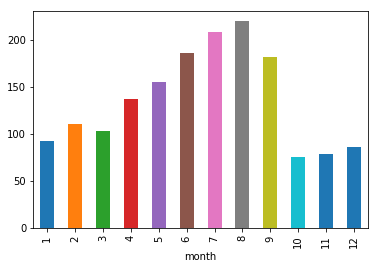

In [17]:
#Based on Hypothesis 2
train.groupby('month')['Count'].mean().plot.bar()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

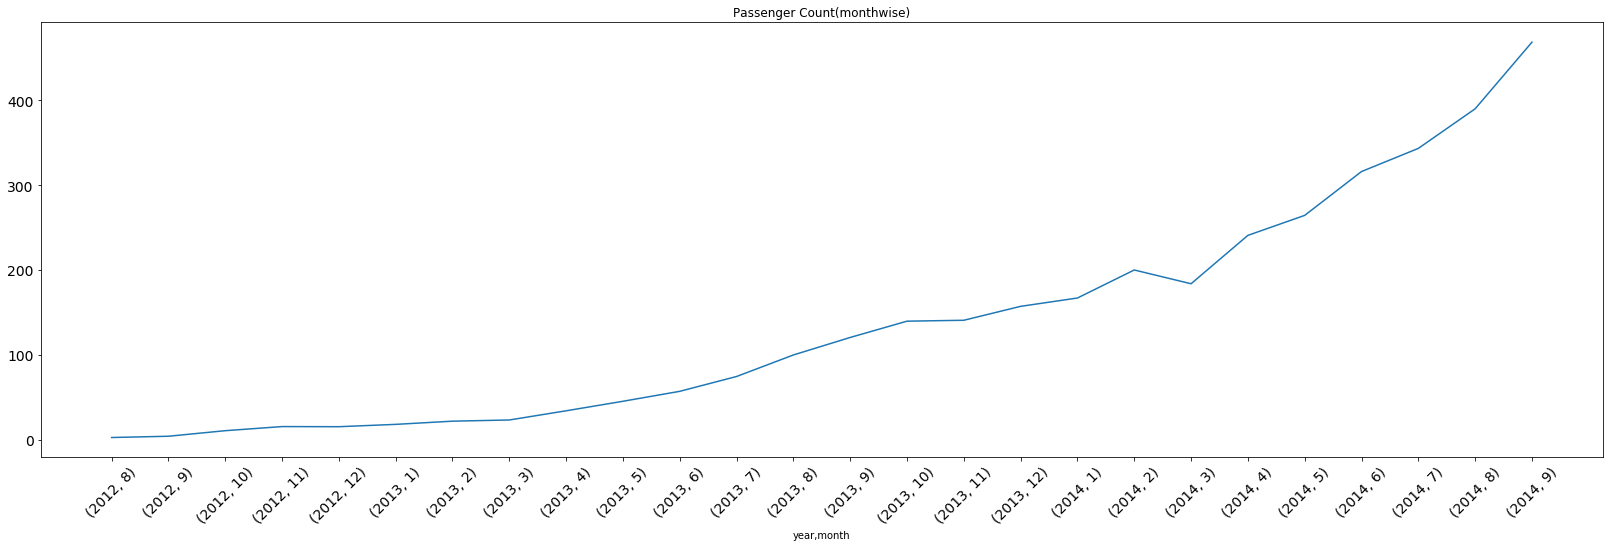

In [18]:
temp3=train.groupby(['year','month'])['Count'].mean()
#temp3.plot(figsize=(15,5),title='Passenger Count(monthwise)',fontsize=14)
temp3.plot(figsize=(28,8),title='Passenger Count(monthwise)',fontsize=14,xticks=(np.arange(len(temp3))))
plt.xticks(rotation = '45')


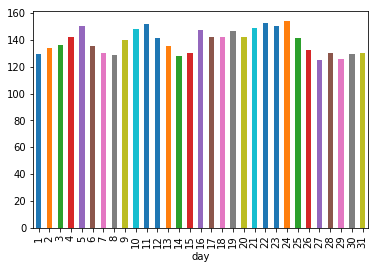

In [19]:
#Daily mean of passenger count.
train.groupby('day')['Count'].mean().plot.bar()

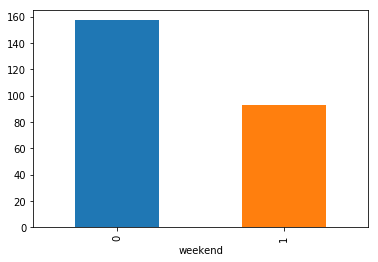

In [20]:
#Based on Hypothesis 3
train.groupby('weekend')['Count'].mean().plot.bar()

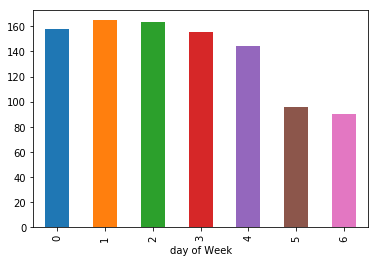

In [21]:
#day wise passenger count.
#0 is the starting of the week, i.e., 0 is Monday and 6 is Sunday.
train.groupby('day of Week')['Count'].mean().plot.bar()

In [22]:
#Before droping Column ID
print(train.columns)

train=train.drop('ID',1)

#After droping Column ID
print(train.columns)

Index(['ID', 'Datetime', 'Count', 'year', 'month', 'day', 'Hour',
       'day of Week', 'weekend'],
      dtype='object')
Index(['Datetime', 'Count', 'year', 'month', 'day', 'Hour', 'day of Week',
       'weekend'],
      dtype='object')


In [23]:
#Before droping Column ID
print(test.columns)

test=test.drop('ID',1)

#After droping Column ID
print(test.columns)

Index(['ID', 'Datetime', 'year', 'month', 'day', 'Hour'], dtype='object')
Index(['Datetime', 'year', 'month', 'day', 'Hour'], dtype='object')


# Make the Model learn

In [24]:
train.Timestamp=pd.to_datetime(train['Datetime'],format ='%d-%m-%y %H:%M')


In [25]:
train.head()

,Datetime,Count,year,month,day,Hour,day of Week,weekend
Datetime,,,,,,,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [26]:
train.index = train.Timestamp 

In [27]:
train.head()

,Datetime,Count,year,month,day,Hour,day of Week,weekend
Datetime,,,,,,,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,2012-08-25 04:00:00,2,2012,8,25,4,5,1


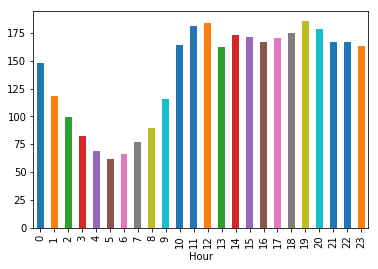

In [28]:
#Based on hypothesis 4
train.groupby('Hour')['Count'].mean().plot.bar()

Now we can see noise in Hourly basis Trend of Passenger count.So we need to make the aggregate of hourly time series to daily,weekly,monthly to make it more stable,so that model can learn.

In [29]:
# Hourly time series 
hourly = train.resample('H').mean()
#determine daily mean
daily = train.resample('D').mean()
#determine daily mean
weekly = train.resample('W').mean()
#determine monthly mean
monthly = train.resample('M').mean()
#determine Quarterly-month mean
quarterly_month = train.resample('Q').mean() 


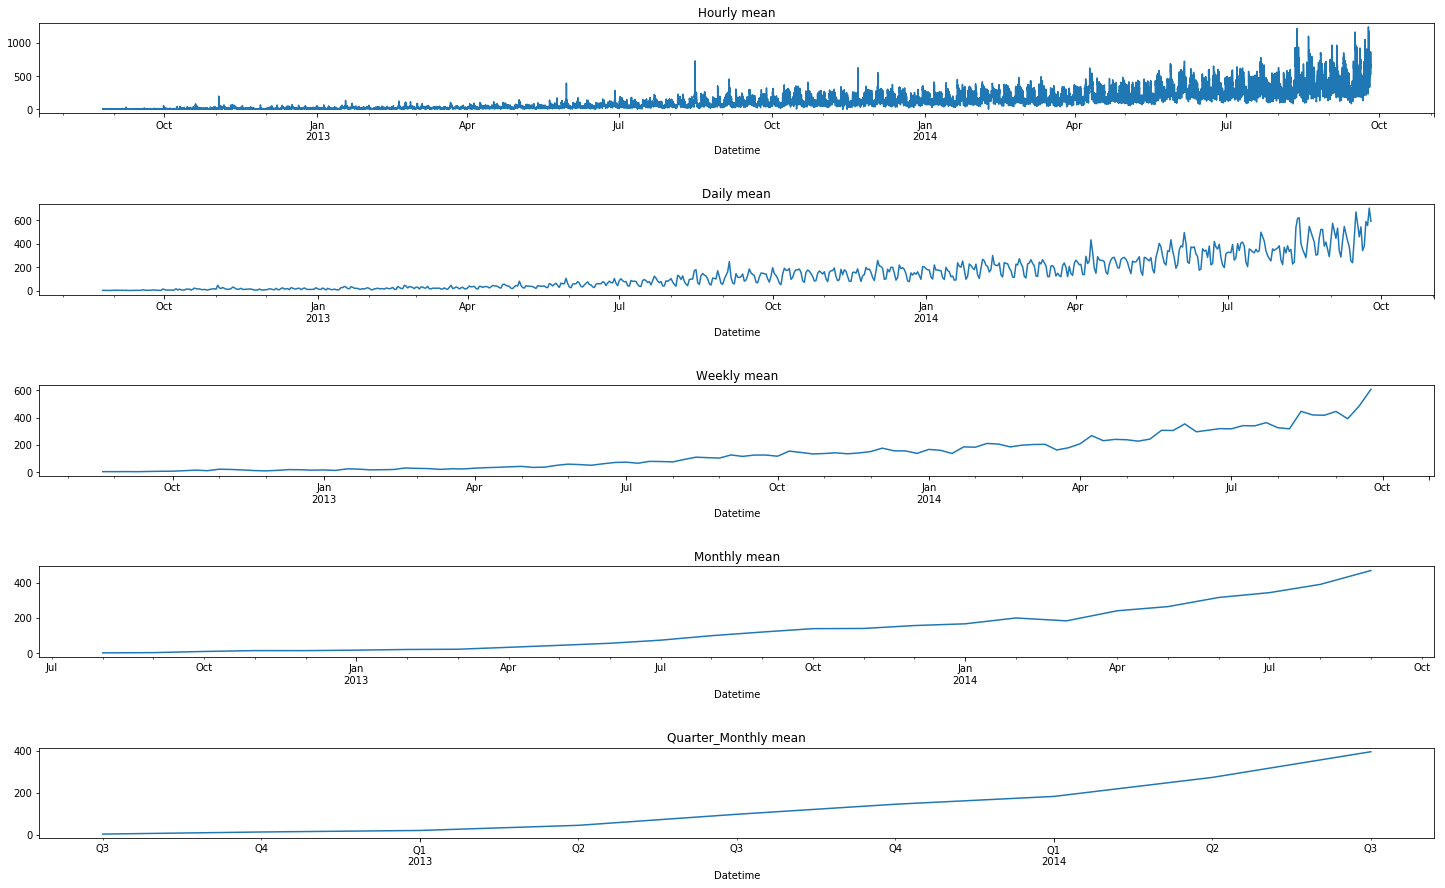

In [30]:
fig,axs=plt.subplots(5,1)
fig.subplots_adjust(hspace=1)
hourly.Count.plot(figsize=(25,15),title='Hourly mean',fontsize=10,ax=axs[0])
daily.Count.plot(figsize=(25,15),title='Daily mean',fontsize=10,ax=axs[1])
weekly.Count.plot(figsize=(25,15),title='Weekly mean',fontsize=10,ax=axs[2])
monthly.Count.plot(figsize=(25,15),title='Monthly mean',fontsize=10,ax=axs[3])
quarterly_month.Count.plot(figsize=(25,15),title='Quarter_Monthly mean',fontsize=10,ax=axs[4])


# Split Train,Validation set

We have done time based validation here by selecting the last 3 months for the validation data and rest in the train data

In [76]:
"""Train_set=train.ix['2012-8-25':'2014-2-24']
Validation_set=train.ix['2014-2-25':'2014-9-25']
print(Train_set.head())
print(Validation_set.head())"""

Train_set=train.ix['2012-8-25':'2014-6-24']
Validation_set=train.ix['2014-6-25':'2014-9-25']
print(Train_set.head())
print(Validation_set.head())

"""Validation_set = train.iloc[16056:18287, :]
Train_set = train.iloc[0:16055, :]
Test_set = test.iloc[18288:,:]"""

                               Datetime  Count  year  month  day  Hour  \
Datetime                                                                 
2012-08-25 00:00:00 2012-08-25 00:00:00      8  2012      8   25     0   
2012-08-25 01:00:00 2012-08-25 01:00:00      2  2012      8   25     1   
2012-08-25 02:00:00 2012-08-25 02:00:00      6  2012      8   25     2   
2012-08-25 03:00:00 2012-08-25 03:00:00      2  2012      8   25     3   
2012-08-25 04:00:00 2012-08-25 04:00:00      2  2012      8   25     4   

                     day of Week  weekend  
Datetime                                   
2012-08-25 00:00:00            5        1  
2012-08-25 01:00:00            5        1  
2012-08-25 02:00:00            5        1  
2012-08-25 03:00:00            5        1  
2012-08-25 04:00:00            5        1  
                               Datetime  Count  year  month  day  Hour  \
Datetime                                                                 
2014-06-25 00:00:00 2014-

'Validation_set = train.iloc[16056:18287, :]\nTrain_set = train.iloc[0:16055, :]\nTest_set = test.iloc[18288:,:]'

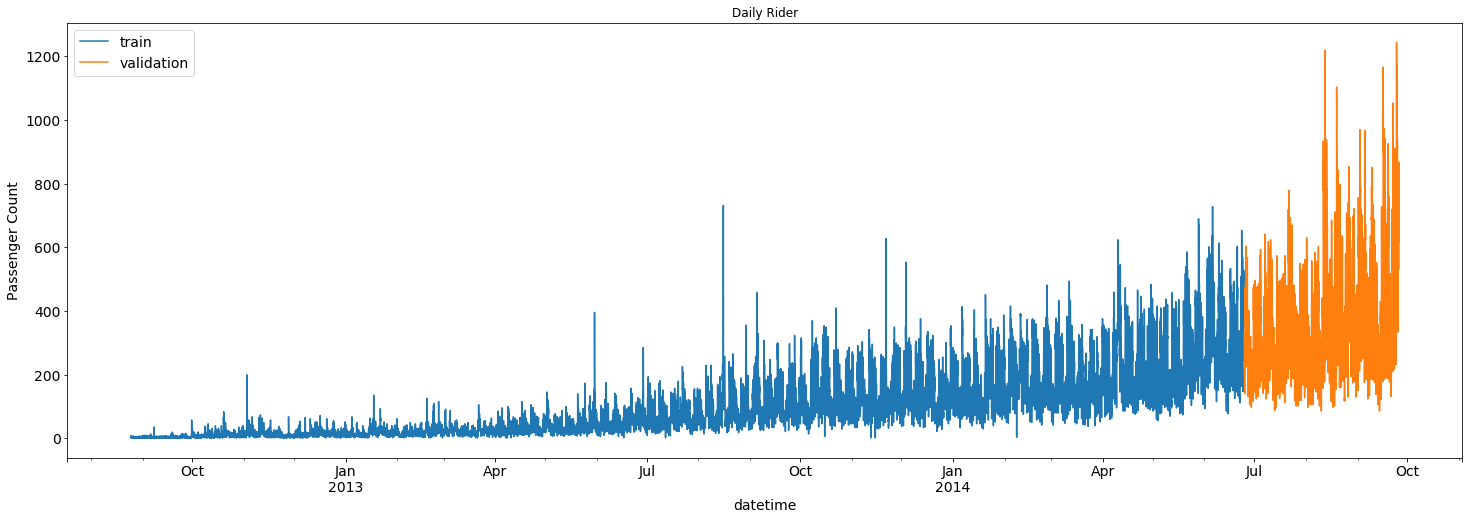

In [77]:
Train_set.Count.plot(figsize=(25,8),title='Daily Rider',fontsize=14,label='train')
Validation_set.Count.plot(figsize=(25,8),title='Daily Rider',fontsize=14,label='validation')
plt.xlabel('datetime',fontsize=14)
plt.ylabel('Passenger Count',fontsize=14)
plt.legend(loc='best',fontsize=14)
plt.show()

# Naive Approach 

In naive bayes, we use the previous values. So, tmp will store all the count. Whereas [len(tmp) - 1] will give us the previous values corresponding to that particular value.




Train.Count is converted into numpy array and stored in tmp,since we are using previous values. 
tmp[len(tmp)-1] will take last element from this array.
We are creating a column called "naive" in y_hat and assigning last element of this array to this column for all records in y_hat. 
So plotting a graph with same value in "Y" axis will give us horizontal line.


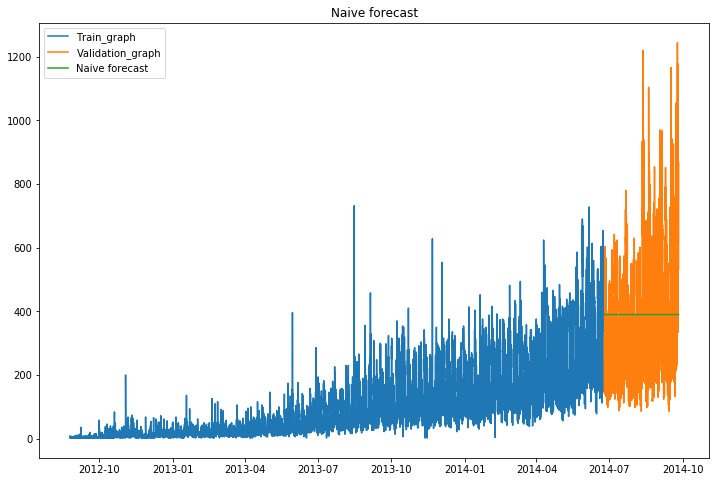

In [78]:
#tmp = np.asarray(Train_set.Count)
y_hat = Validation_set.copy()
#y_hat_o = Test_set.copy()
#print(y_hat_o.head())

y_hat['naive_count'] = Train_set['Count'][len(Train_set)-1]
#print(y_hat['naive_count'].tail())
plt.figure(figsize = (12,8))
plt.plot(Train_set.index,Train_set.Count,label = 'Train_graph')
plt.plot(Validation_set.index,Validation_set.Count,label = 'Validation_graph')
#plt.plot(Test_set.index,Test_set.Count,label = 'Test_graph')
plt.plot(y_hat.index,y_hat['naive_count'],label = 'Naive forecast')
plt.legend(loc = 'best',fontsize = 10)
plt.title('Naive forecast')
plt.show()



In [79]:
rmse = pd.DataFrame(columns=['Method', 'RMSE'])

# Calculate RMSE for Naive method
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse.loc[len(rmse)]="Naive", sqrt(mean_squared_error(Validation_set.Count, y_hat.naive_count))
rmse

,Method,RMSE
0,Naive,186.373685


# Calculate RMSE since its our evaluation metrics:

In [80]:
from sklearn.metrics import mean_squared_error
from math import sqrt
"""rms = sqrt(mean_squared_error(Validation_set.Count,y_hat.naive))
print(rms)"""

'rms = sqrt(mean_squared_error(Validation_set.Count,y_hat.naive))\nprint(rms)'

We can infer that this method is not suitable for datasets with high variability. We can reduce the rmse value by adopting different techniques.

# Moving Average Approach

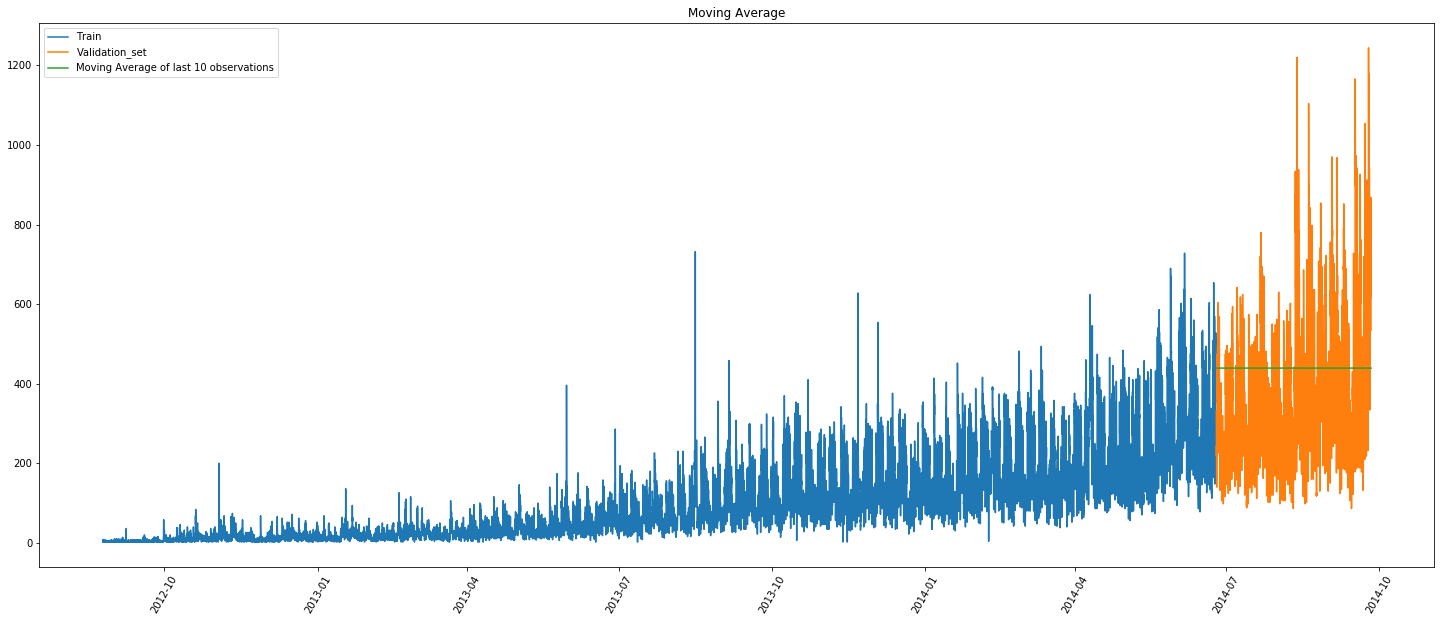

,Method,RMSE
0,Naive,186.373685
1,MA_for_10_obsvn,192.938057


In [81]:
y_hat_avg = Validation_set.copy()

#Average of last 10 observations.
y_hat_avg['Moving Average of last 10 observations'] = Train_set.Count.rolling(10).mean().iloc[-1]
plt.figure(figsize=(25,10))
plt.plot(Train_set.Count,label = 'Train')
plt.plot(Validation_set.Count,label = 'Validation_set')
plt.plot(y_hat_avg['Moving Average of last 10 observations'],label = 'Moving Average of last 10 observations')
plt.legend(loc = 'best')
plt.xticks(rotation=60)
plt.title('Moving Average')
plt.show()

"""rms1 = sqrt(mean_squared_error(Validation_set.Count,y_hat_avg['Moving Average of last 10 observations']))
rms1
"""
rmse.loc[len(rmse)]="MA_for_10_obsvn", sqrt(mean_squared_error(Validation_set.Count,y_hat_avg['Moving Average of last 10 observations']))
rmse


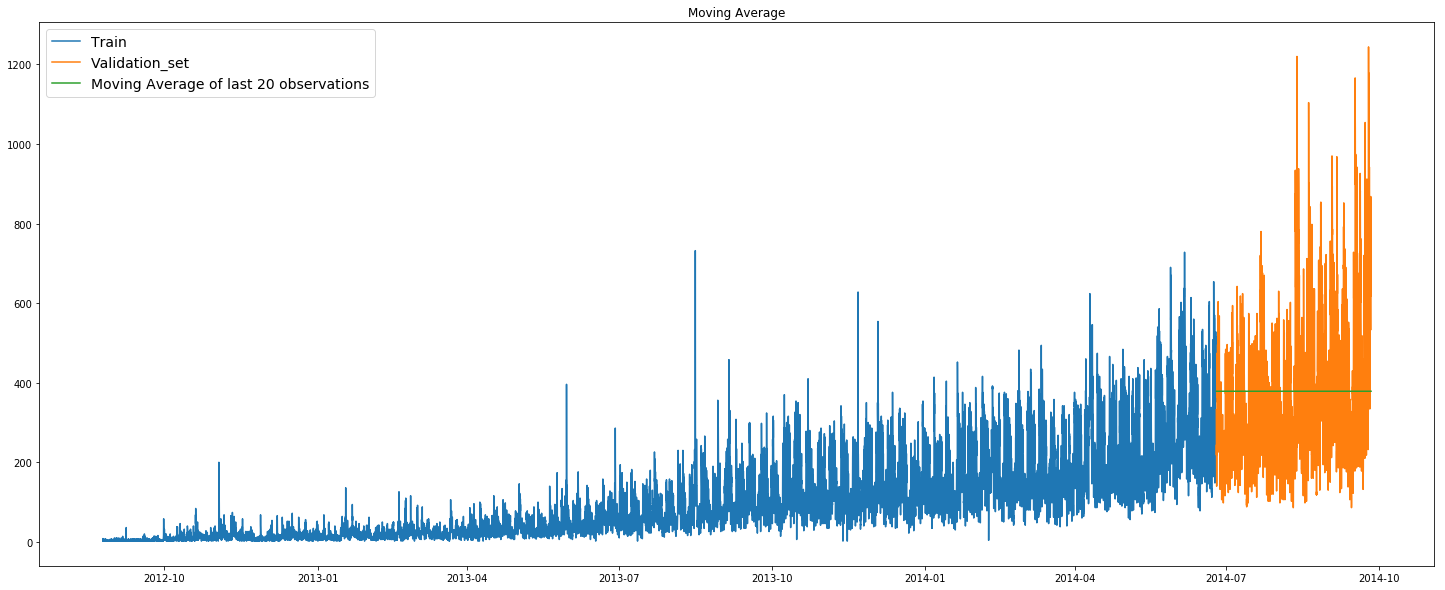

,Method,RMSE
0,Naive,186.373685
1,MA_for_10_obsvn,192.938057
2,MA_for_20_obsvn,186.679009


In [82]:

#Average of last 20 observations.
y_hat_avg['Moving Average of last 20 observations'] = Train_set.Count.rolling(20).mean().iloc[-1]
plt.figure(figsize=(25,10))
plt.plot(Train_set.Count,label = 'Train')
plt.plot(Validation_set.Count,label = 'Validation_set')
plt.plot(y_hat_avg['Moving Average of last 20 observations'],label = 'Moving Average of last 20 observations')
plt.legend(loc = 'best',fontsize = 14)
plt.title('Moving Average')
plt.show()

"""rms2 = sqrt(mean_squared_error(Validation_set.Count,y_hat_avg['Moving Average of last 20 observations']))
rms2"""

rmse.loc[len(rmse)]="MA_for_20_obsvn", sqrt(mean_squared_error(Validation_set.Count,y_hat_avg['Moving Average of last 20 observations']))
rmse

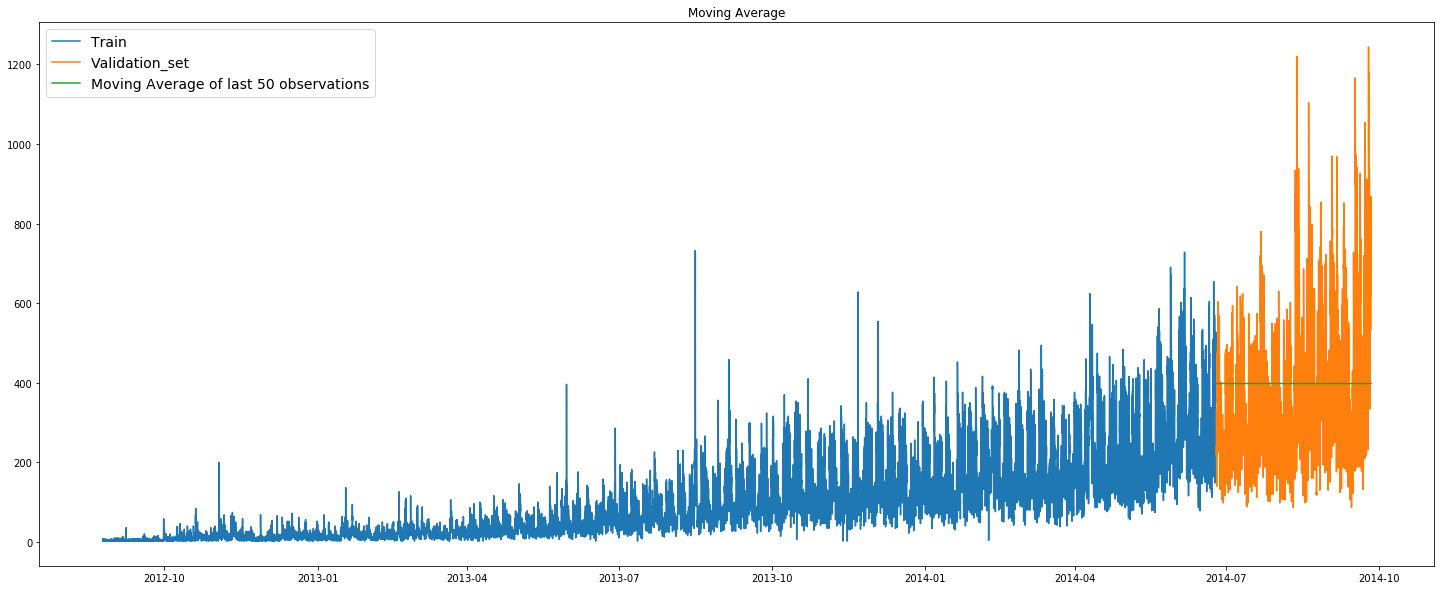

,Method,RMSE
0,Naive,186.373685
1,MA_for_10_obsvn,192.938057
2,MA_for_20_obsvn,186.679009
3,MA_for_50_obsvn,186.577376


In [83]:
#Average of last 50 observations.
y_hat_avg['Moving Average of last 50 observations'] = Train_set.Count.rolling(50).mean().iloc[-1]
plt.figure(figsize=(25,10))
plt.plot(Train_set.Count,label = 'Train')
plt.plot(Validation_set.Count,label = 'Validation_set')
plt.plot(y_hat_avg['Moving Average of last 50 observations'],label = 'Moving Average of last 50 observations')
plt.legend(loc = 'best',fontsize = 14)
plt.title('Moving Average')
plt.show()

"""rms3 = sqrt(mean_squared_error(Validation_set.Count,y_hat_avg['Moving Average of last 50 observations']))
rms3
"""

rmse.loc[len(rmse)]="MA_for_50_obsvn", sqrt(mean_squared_error(Validation_set.Count,y_hat_avg['Moving Average of last 50 observations']))
rmse




# SES Model

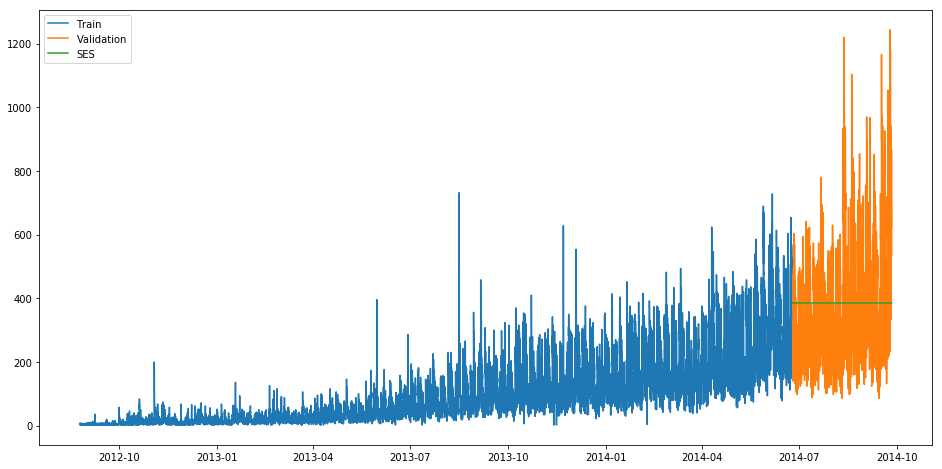

In [84]:
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt
y_hat_avg = Validation_set.copy()
fit2 = SimpleExpSmoothing(np.asarray(Train_set.Count)).fit(smoothing_level=0.6,optimized = False)
y_hat_avg['SES']=fit2.forecast(len(Validation_set))
plt.figure(figsize=(16,8))
plt.plot(Train_set.Count,label ='Train')
plt.plot(Validation_set.Count,label ='Validation')
plt.plot(y_hat_avg['SES'],label ='SES')
plt.legend(loc = 'best')
plt.show()





In [85]:
"""rmse_SES = sqrt(mean_squared_error(Validation_set.Count,y_hat_avg['SES']))
print(rmse_SES)
"""
rmse.loc[len(rmse)]="SES", sqrt(mean_squared_error(Validation_set.Count,y_hat_avg['SES']))


In [86]:
rmse.head()

,Method,RMSE
0,Naive,186.373685
1,MA_for_10_obsvn,192.938057
2,MA_for_20_obsvn,186.679009
3,MA_for_50_obsvn,186.577376
4,SES,186.409447


SES model gave us reduced RMSE value.

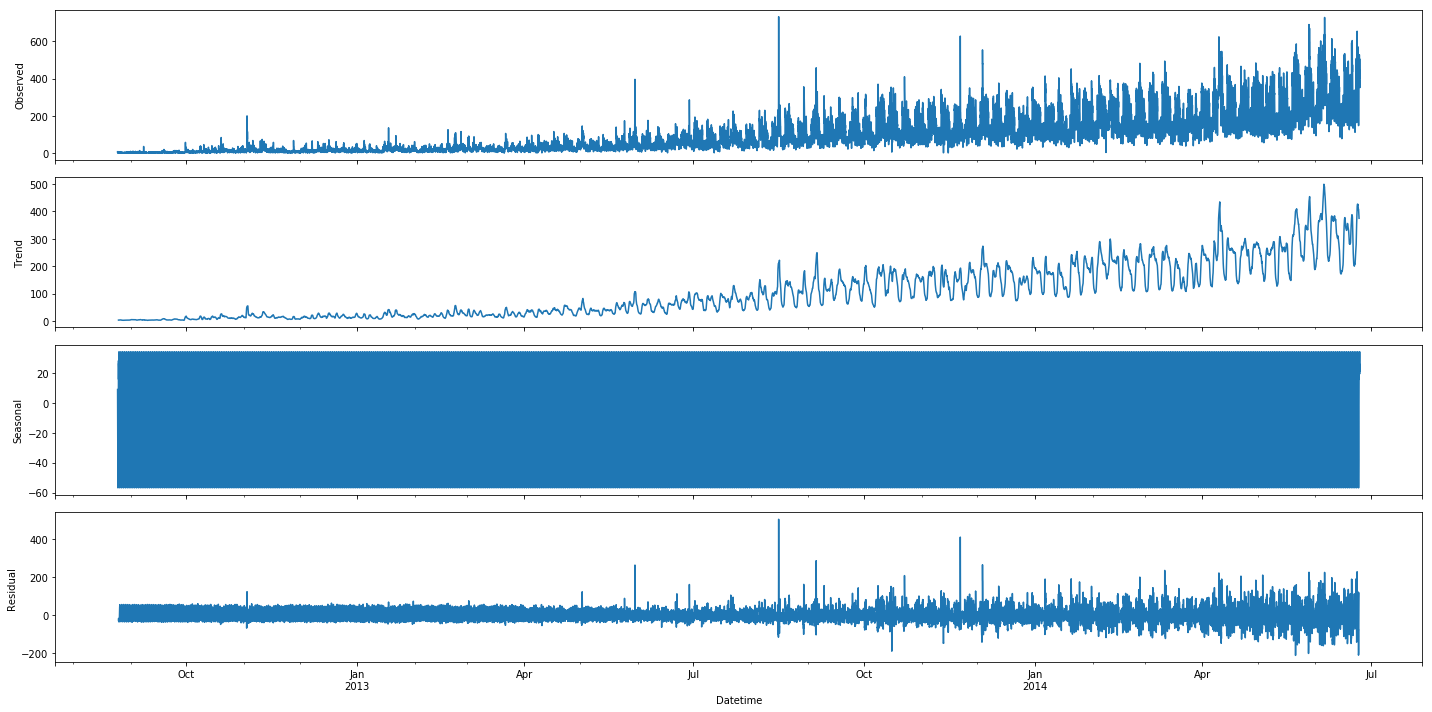

In [87]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(Train_set.Count).plot()
result=sm.tsa.stattools.adfuller(train.Count)
plt.show()


# Holt-Linear Trend Model

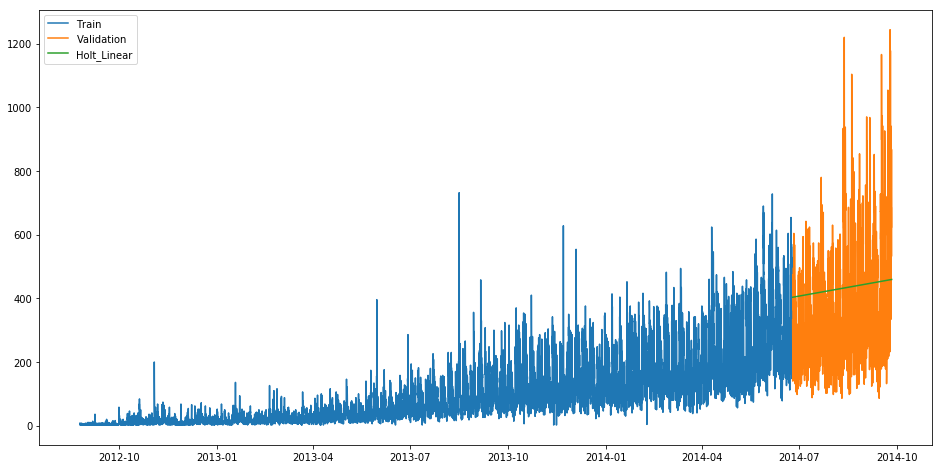

In [88]:
y_hat_avg = Validation_set.copy()
fit1 = Holt(np.asarray(Train_set.Count)).fit(smoothing_level = 0.3)
y_hat_avg['Holt_Linear']=fit1.forecast(len(Validation_set))
plt.figure(figsize = (16,8))
plt.plot(Train_set.Count,label = 'Train')
plt.plot(Validation_set.Count,label = 'Validation')
plt.plot(y_hat_avg['Holt_Linear'],label = 'Holt_Linear')
plt.legend(loc = 'best')
plt.show()



In [89]:
rmse.loc[len(rmse)]='Holt_Linear',sqrt(mean_squared_error(Validation_set.Count,y_hat_avg['Holt_Linear']))
rmse

,Method,RMSE
0,Naive,186.373685
1,MA_for_10_obsvn,192.938057
2,MA_for_20_obsvn,186.679009
3,MA_for_50_obsvn,186.577376
4,SES,186.409447
5,Holt_Linear,186.813527


# Loading the Submission file for final prediction on test dataset

In [90]:
submission = pd.read_csv('Sample_Submission_QChS6c3.csv')

## Determine HLT model prediction on test data set

In [91]:
test.head()

,Datetime,year,month,day,Hour,prediction
0,2014-09-26 00:00:00,2014,9,26,0,285.093436
1,2014-09-26 01:00:00,2014,9,26,1,285.114933
2,2014-09-26 02:00:00,2014,9,26,2,285.136430
3,2014-09-26 03:00:00,2014,9,26,3,285.157927
4,2014-09-26 04:00:00,2014,9,26,4,285.179423


In [92]:
# model prediction based on daily basis.

In [93]:
predict = fit1.forecast(len(test))
test["prediction"] = predict


In [94]:
# model prediction based on hourly basis.

We have to convert these predictions to hourly basis. 
* To do so we will first calculate the ratio of passenger count for each hour of every day. 
* Then we will find the average ratio of passenger count for every hour and we will get 24 ratios. 
* Then to calculate the hourly predictions we will multiply the daily prediction with the hourly ratio.

In [95]:
# Calculating the hourly ratio of count 

train_original['ratio'] = train_original.Count/train_original.Count.sum()

In [96]:
# Grouping the hourly ratio

temp = train_original.groupby(['Hour'])['ratio'].sum()

In [97]:
# Groupby to csv format
pd.DataFrame(temp,columns=['Hour','ratio']).to_csv('GROUPby.csv')

In [98]:
temp2 = pd.read_csv('GROUPby.csv')
temp2.head()

,Hour,Hour.1,ratio
0,0,NaN,0.044287
1,1,NaN,0.035343
2,2,NaN,0.029911
3,3,NaN,0.024714
4,4,NaN,0.020802


In [99]:
temp2 = temp2.drop('Hour.1',1)
temp2.head()

,Hour,ratio
0,0,0.044287
1,1,0.035343
2,2,0.029911
3,3,0.024714
4,4,0.020802


In [100]:
#Merge Test and Test_original datasets on day,month,year

merge = pd.merge(test,test_original,on = ('day','month','year'),how = 'left')
merge['Hour']= merge['Hour_y']
#merge.head()

In [101]:
#remove non-value added columns.

merge = merge.drop(['year','month','Datetime_x','Datetime_y','Hour_x','Hour_y'],axis = 1)
#merge.head()

In [102]:
# merging merge and temp2

prediction = pd.merge(merge,temp2, on = 'Hour',how = 'left')


In [103]:
# Converting the ratio to original scale

prediction['Count'] = prediction['prediction']*prediction['ratio']*24
#prediction['ID'] = prediction['ID_y']


In [104]:
# Now lets drop all the columns from Prediction dataset so that we can arrive with submission.

submission = prediction.drop(['day','prediction','Hour','ratio'],axis = 1)

In [105]:
#Converting the final submission to csv format 

pd.DataFrame(submission, columns=['ID','Count']).to_csv('Holt linear.csv')

In [106]:
HLT = pd.read_csv('Holt linear.csv')


In [107]:
HLT.Count.mean()

467.3883987189744

# Holt- Winter Model

In [108]:
#fit_Hw = ExponentialSmoothing(np.asarray(Train_set['Count']),seasonal_periods = 7,trend = 'add', seasonal = 'add').fit()

In [109]:
#y_hat_avg['Holt-Winter'] = fit_Hw.forecast(len(Validation_set))

In [110]:
"""plt.figure(figsize=(16,8))
plt.plot(Train_set.Count,label = 'Train')
plt.plot(Validation_set.Count,label = 'Validation')
plt.plot(y_hat_avg['Holt-Winter'],label = 'Holt_Winter')
plt.legend(loc = 'best')
plt.show()"""

"plt.figure(figsize=(16,8))\nplt.plot(Train_set.Count,label = 'Train')\nplt.plot(Validation_set.Count,label = 'Validation')\nplt.plot(y_hat_avg['Holt-Winter'],label = 'Holt_Winter')\nplt.legend(loc = 'best')\nplt.show()"

In [111]:
"""from statsmodels.tsa.holtwinters import Holt

y_hat_avg = Validation_set.copy()
#fit1 = Holt(np.asarray(Train_set['Count'])).fit()

#y_hat_avg['Holt_Winters'] = fit1.predict(start=1,end=15)

model = ExponentialSmoothing(np.asarray(Train_set['Count']), trend='add', seasonal='add', seasonal_periods=7, damped=True)
hw_model = model.fit(optimized=True, use_boxcox=False, remove_bias=False)
pred = hw_model.predict(start=Validation_set.index[0], end=Validation_set.index[-1])"""


#plt.savefig('Holt_Winters.jpg')

"from statsmodels.tsa.holtwinters import Holt\n\ny_hat_avg = Validation_set.copy()\n#fit1 = Holt(np.asarray(Train_set['Count'])).fit()\n\n#y_hat_avg['Holt_Winters'] = fit1.predict(start=1,end=15)\n\nmodel = ExponentialSmoothing(np.asarray(Train_set['Count']), trend='add', seasonal='add', seasonal_periods=7, damped=True)\nhw_model = model.fit(optimized=True, use_boxcox=False, remove_bias=False)\npred = hw_model.predict(start=Validation_set.index[0], end=Validation_set.index[-1])"

In [112]:
"""rmse.loc[len(rmse)]='Holt-Winter',sqrt(mean_squared_error(Validation_set.Count,y_hat_avg['Holt-Winter']))
rmse"""

"rmse.loc[len(rmse)]='Holt-Winter',sqrt(mean_squared_error(Validation_set.Count,y_hat_avg['Holt-Winter']))\nrmse"

# ARIMA

In [113]:
#To Check Whether the time series is stationary or not ,for that we use Dickey Fuller test   

In [114]:
from statsmodels.tsa.stattools import adfuller

In [115]:
def test_stationary(timeseries):
    #Determine Rolling Statistics
    """rolmean = pd.rolling_mean(timeseries,window = 24)
    rolstd = pd.rolling_std(timeseries,window = 24)
    """
    rolmean = timeseries.rolling(24).mean()
    rolstd = timeseries.rolling(24).std()
    
    #Plot Rolling statistics
    orig = plt.plot(timeseries,color = 'blue',label = 'original')
    mean = plt.plot(rolmean,color = 'red',label = 'rollingmean')
    std = plt.plot(rolstd,color = 'black',label = 'rollingstd')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block = False)
    
    #perform Dickey Fuller Test
    print('Results of DF Test:')
    dftest = adfuller(timeseries,autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4],index = ['Test_Statistic','p-value','#Lags Used','Number of Observations'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical value(%s)'%key] = value
    print(dfoutput)
        
    

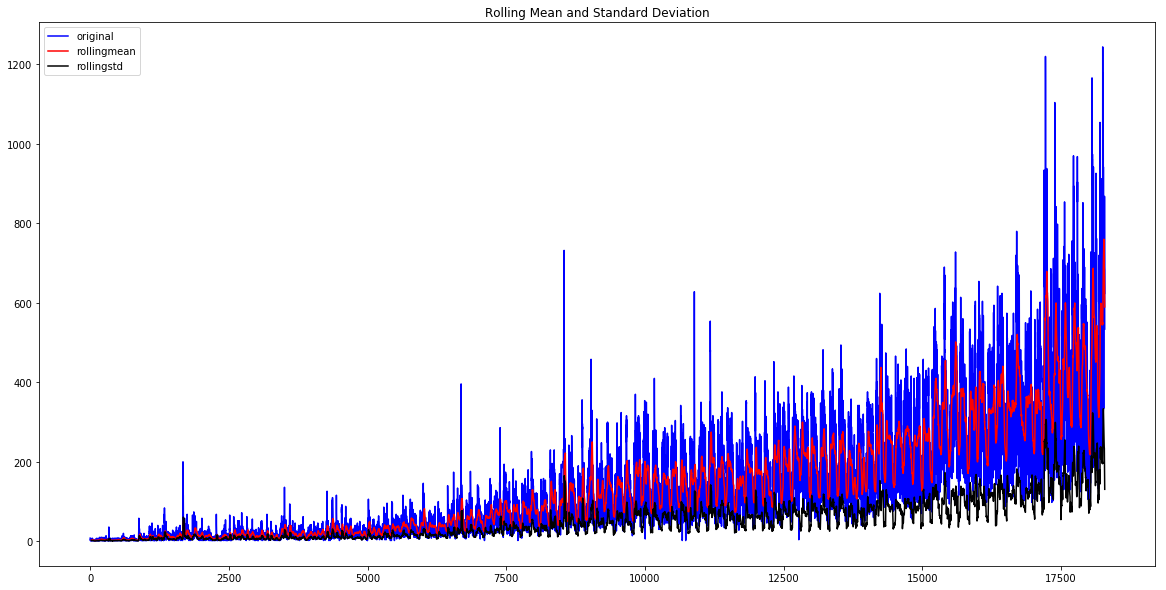

Results of DF Test:
Test_Statistic               -4.456561
p-value                       0.000235
#Lags Used                   45.000000
Number of Observations    18242.000000
Critical value(1%)           -3.430709
Critical value(5%)           -2.861698
Critical value(10%)          -2.566854
dtype: float64


In [116]:
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 20,10

test_stationary(train_original.Count)

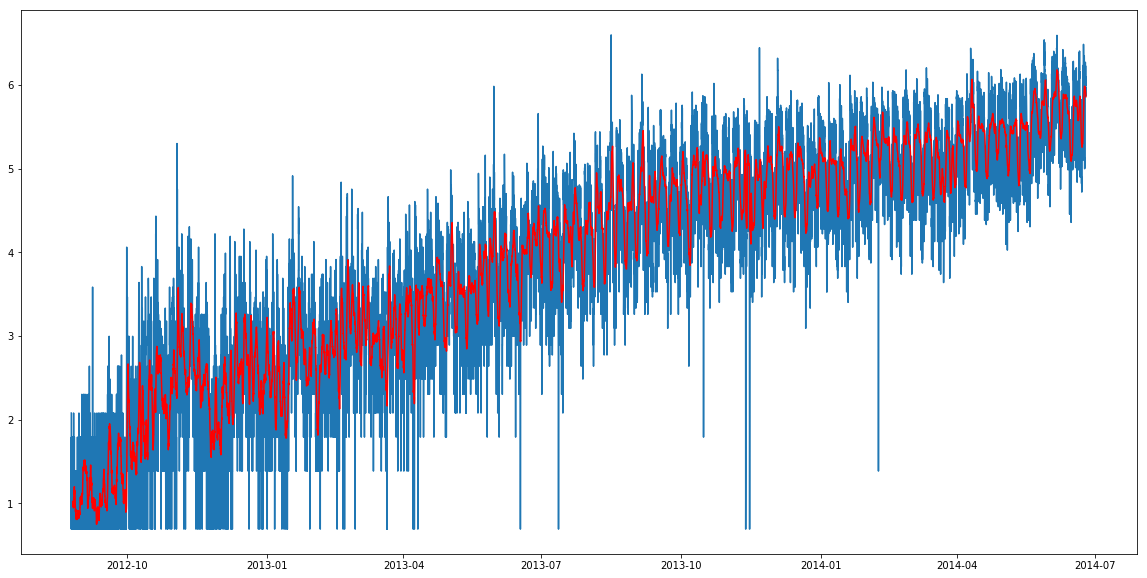

In [117]:
train_log = np.log(Train_set.Count)
valid_log = np.log(Validation_set.Count)

#moving_avg = pd.rollingmean(train_log,24)
moving_avg = train_log.rolling(24).mean()
plt.plot(train_log)
plt.plot(moving_avg,color = 'red')
plt.show()

In [120]:
train_log_moving_avg_diff = train_log - moving_avg


Since we took the average of 24 values, rolling mean is not defined for the first 23 values. So let’s drop those null values.

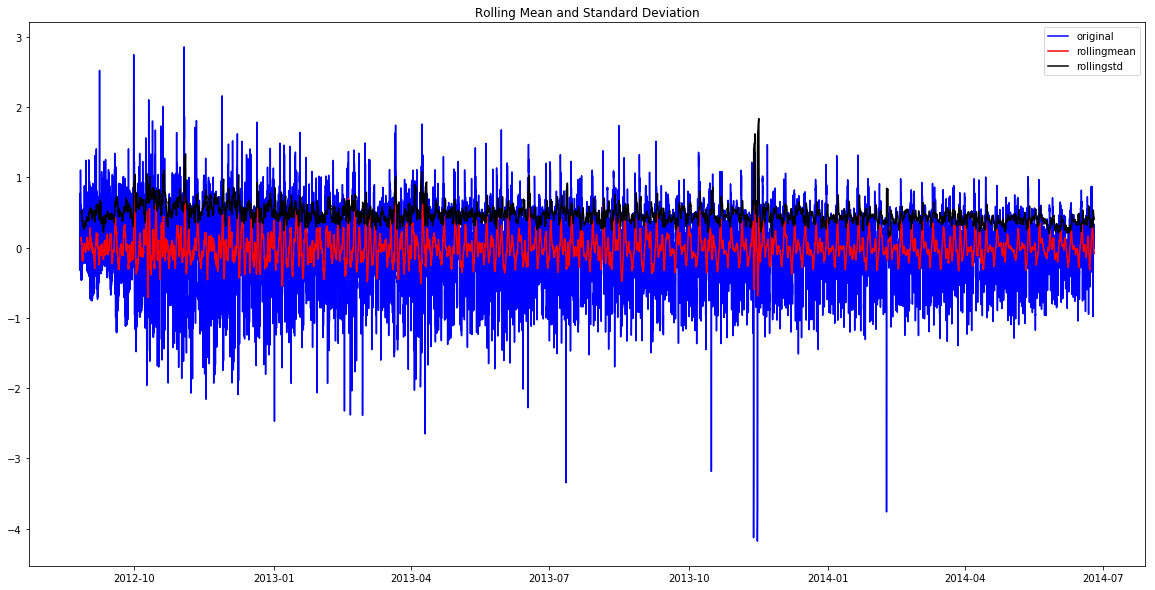

Results of DF Test:
Test_Statistic              -22.470949
p-value                       0.000000
#Lags Used                   43.000000
Number of Observations    15989.000000
Critical value(1%)           -3.430759
Critical value(5%)           -2.861721
Critical value(10%)          -2.566866
dtype: float64


In [121]:
train_log_moving_avg_diff.dropna(inplace = True)
test_stationary(train_log_moving_avg_diff)

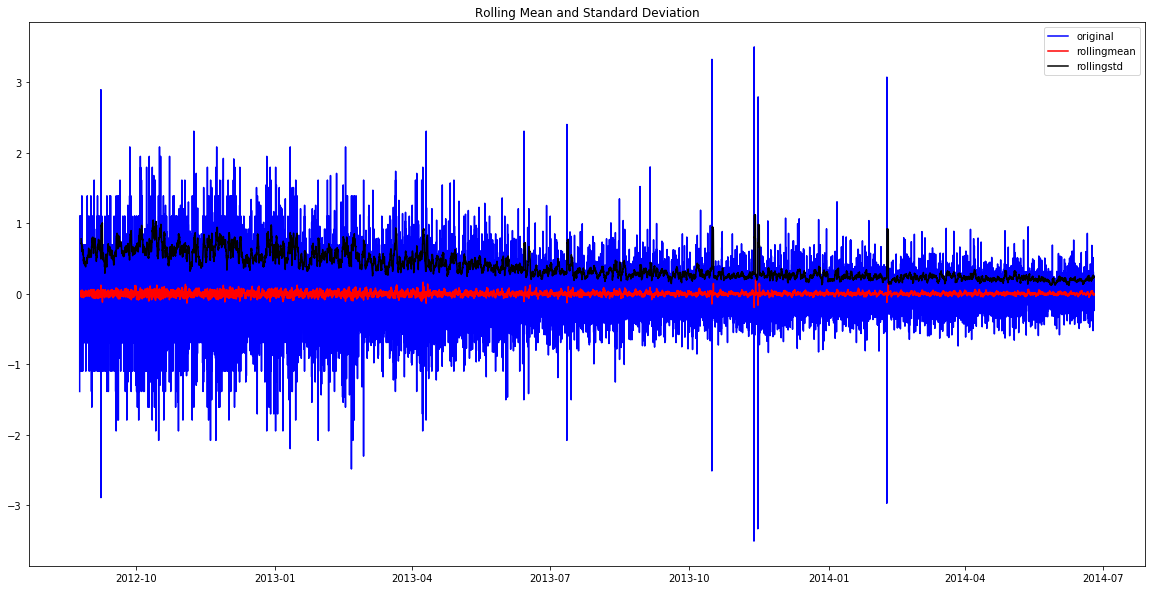

Results of DF Test:


MissingDataError: exog contains inf or nans

In [123]:
train_log_diffrn = train_log - train_log.shift(1)
test_stationary(train_log_diffrn)